In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


In [2]:
df=pd.read_csv('/kaggle/input/zomato-eda/zomato.csv')
df.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


DATA CLEANING

In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.drop(['url','address','phone'],axis=1,inplace=True)

In [6]:
df.rename(columns={'name':'restaurant','approx_cost(for two people)':'approx_cost','reviews_list':'reviews','menu_item':'menu','listed_in(type)':'type','listed_in(city)':'city'},inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

restaurant          0
online_order        0
book_table          0
rate             7760
votes               0
location           21
rest_type         227
dish_liked      28027
cuisines           45
approx_cost       345
reviews             0
menu                0
type                0
city                0
dtype: int64

In [9]:
df.set_index('restaurant',inplace=True)

In [10]:
df.dtypes

online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
dish_liked      object
cuisines        object
approx_cost     object
reviews         object
menu            object
type            object
city            object
dtype: object

In [11]:
# df['rate'].str.replace(r' /5','',regex=True).str.replace('NEW|-','0').unique()#.astype('float')

In [12]:
df['rate'].replace({"/5":'','NEW|-':'0'},regex=True,inplace=True)
df['rate']= df['rate'].astype('float')


In [13]:
df['menu'].replace('[]','N/A',inplace=True)

In [14]:
df['approx_cost'].replace(r',','',regex=True,inplace=True)
df['approx_cost']=df['approx_cost'].astype('float')


DATA VISUALISATION

In [15]:
df.dtypes

online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
approx_cost     float64
reviews          object
menu             object
type             object
city             object
dtype: object

In [16]:
df

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,reviews,menu,type,city
restaurant,,,,,,,,,,,,,
Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",N/A,Buffet,Banashankari
Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",N/A,Buffet,Banashankari
San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",N/A,Buffet,Banashankari
Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",N/A,Buffet,Banashankari
Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",N/A,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",N/A,Pubs and bars,Whitefield
Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600.0,[],N/A,Pubs and bars,Whitefield
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,2000.0,[],N/A,Pubs and bars,Whitefield


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Restaurant Delivering online or Not**

Text(0.5, 1.0, 'Restaurant Delivering Online or NoT')

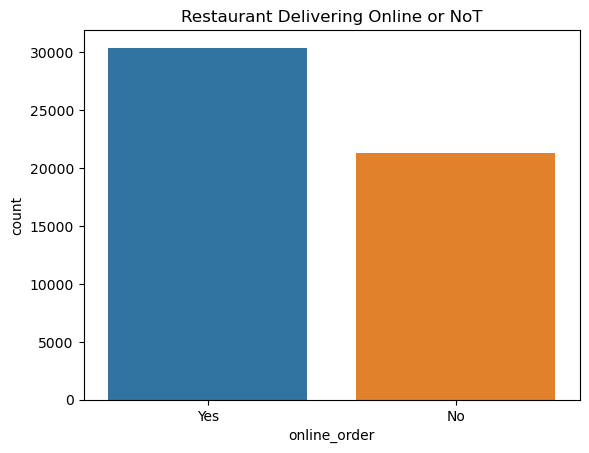

In [18]:
sns.countplot(x='online_order',data=df).set_title('Restaurant Delivering Online or NoT')


From the above graph we can conclude that almost 30,000 restaurants have Online Delivery Service.

**Restaurants allowable table booking or not**

Text(0.5, 1.0, 'Restaurants Allowable Table booking or Not')

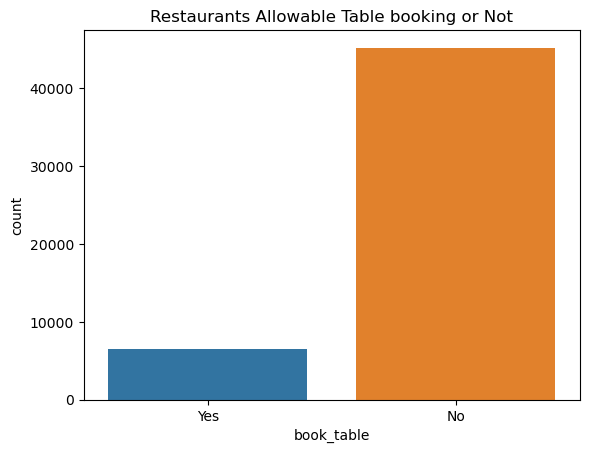

In [19]:
sns.countplot(x='book_table',data=df).set_title('Restaurants Allowable Table booking or Not')

From the above graph,we can say that more than 40,000 restaurants does not allow for tablew booking and very few restaurants are allow for table booking.

Text(0.5, 1.0, 'Table Booking Rate vs Rate')

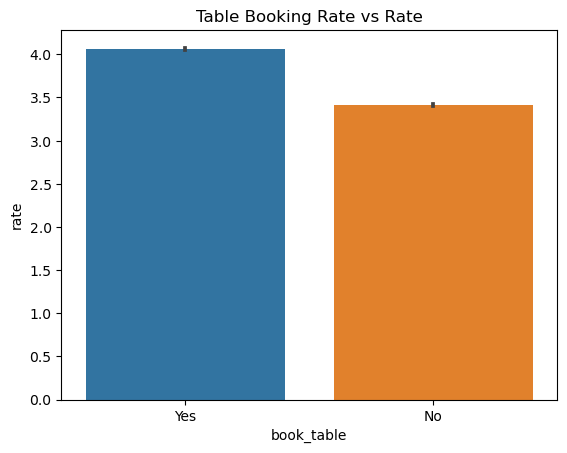

In [20]:
sns.barplot(x='book_table',y='rate',data=df).set_title('Table Booking Rate vs Rate')


From the abovegraph,we can conclude that the restaurants which allows for table booking have the highest rate i.e. almost 4.0 and also the rate of restaurants which does not allows fortable booking having rate more than 3.0.

**Best Location**

<Axes: title={'center': 'Best Location'}>

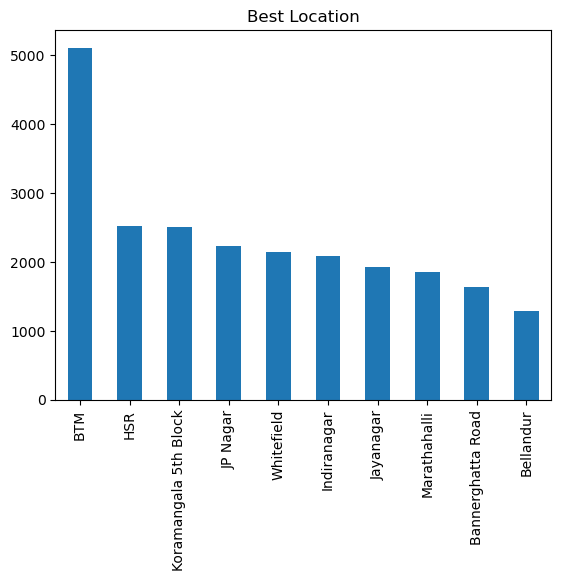

In [21]:
df['location'].value_counts().nlargest(10).plot(kind='bar',title='Best Location')


From thew above graph ,we can say that, BTM is the best location as compared to other restaurants.

<Axes: title={'center': 'Relation between Location and Rate'}, xlabel='location'>

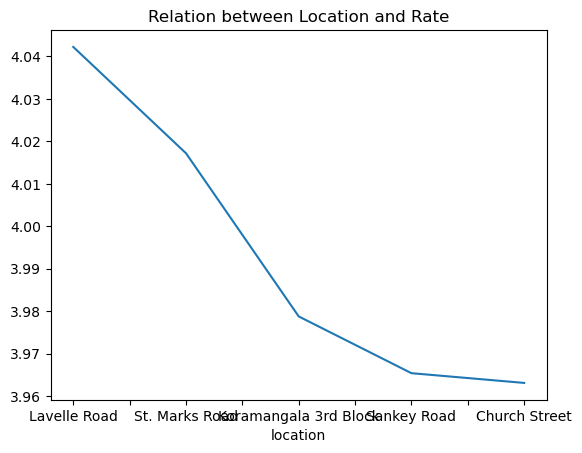

In [22]:
df.groupby('location')['rate'].mean().nlargest(5).plot(kind='line',title='Relation between Location and Rate')

From the above graph,we can conclude that Lavelle Road has the highest rate as compared to other location.

**Restaurant Type**

<Axes: title={'center': 'Restaurant Type'}>

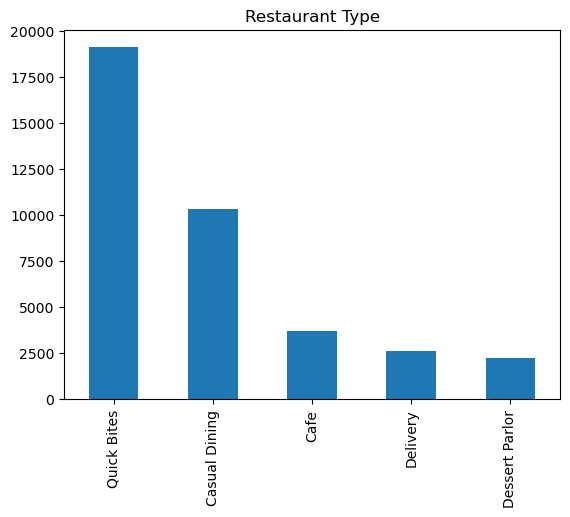

In [23]:
df['rest_type'].value_counts().nlargest(5).plot(kind='bar',title='Restaurant Type')

We can say that,the restaurant type Quick Bites has highest count as compared to others, as most of the people prefer restaurant type of Quick Bites.

**Gaussian Restaurant type and Rating**

<Axes: ylabel='Density'>

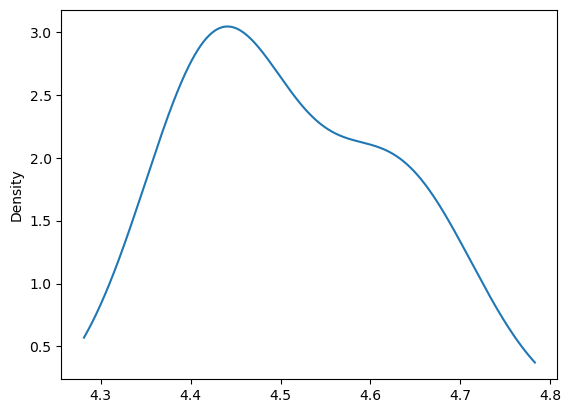

In [24]:
df.groupby('rest_type')['rate'].mean().nlargest().plot(kind='kde')

From the above graph we can conclude that most of the restaurant type rating lies between 4.4 to 4.5.

Relation between Type and Rating

<Axes: title={'center': 'Relation between Type and Rating'}, xlabel='type'>

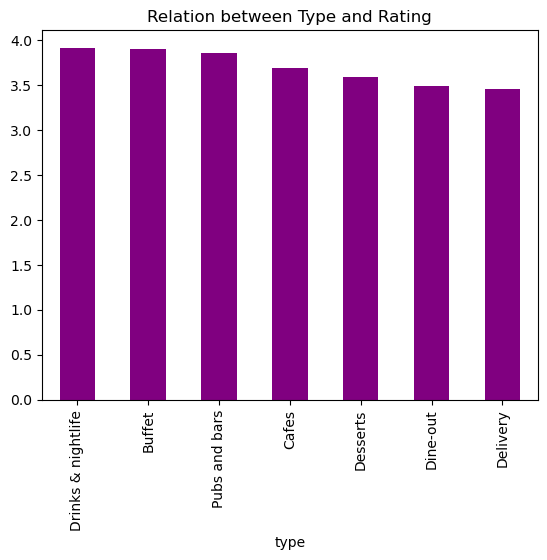

In [25]:
df.groupby('type')['rate'].mean().nlargest(10).plot(kind='bar',color='purple',title='Relation between Type and Rating')


**From the above graph,we can say that Drinks and nightlife and Buffet both have almost same rating i.e. above 3.5 as compared to others type of restaurant.**

Cost of Restaurants

Text(0.5, 1.0, 'Types of Services')

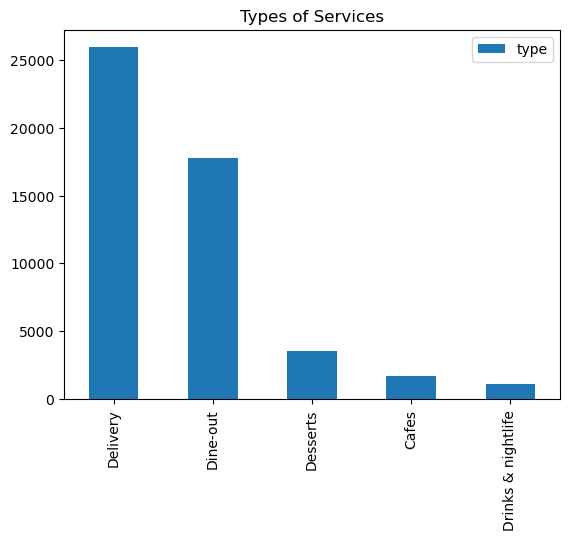

In [26]:
df['type'].value_counts().head(5).plot(kind='bar',legend=True).set_title('Types of Services')
# sns.barplot(data=df,x='type',y='rate')

<Axes: title={'center': 'Number of Restaurants in Location'}>

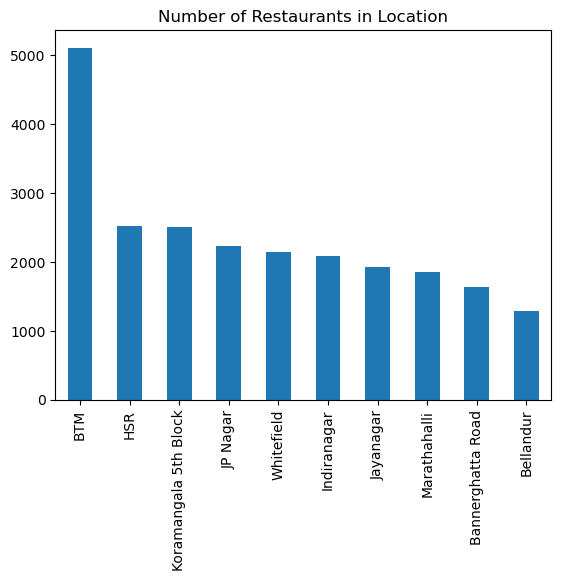

In [27]:
df['location'].value_counts().head(10).plot(kind='bar',title='Number of Restaurants in Location')